In [1]:
using Pkg; Pkg.activate(".");
Pkg.precompile()
using Plots; plotlyjs();
using FourierAnalysis, FFTW, DSP, CSV, Tables;

 Activating environment at `~/Documents/thesis.git/coding/01_exploration/Project.toml`


HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-1507645727699474017\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-5193869513315172537\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-1507645727699474017\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

Precompiling project...


In [11]:
ecg_matrix = CSV.File("../mitbih/100.mitbih") |> Tables.matrix;

fs = 360     # 360 samples per second
N  = 20 * fs  # equivalent to 2 seconds

ecg = ecg_matrix[1:N, 2:3];
digital_filter = digitalfilter(Lowpass(0.2), Butterworth(1))
ecg_filtered = copy(ecg)
ecg_filtered[:,:] = filt(digital_filter, ecg[:,:]);

In [12]:
# using FFTW.jl only

#Σ = abs.(P * ecg)

#p1 = plot(Σ[brange(N, DC=false), :], labels="fftw raw", xlim=(0, 100));

In [27]:
# using FourierAnalysis.jl
Σ = spectra(ecg, fs, N; tapering=rectangular, func=√, DC=false)

p2 = plot(Σ.y[brange(N, DC=true), :], labels="fa raw");

LoadError: BoundsError: attempt to access 3600×2 Array{Float64,2} at index [1:3601, 1:2]

In [28]:
# using FFTW.jl only
#P = plan_rfft(ecg, 1) * (2 / N);
#Σ = abs.(P * ecg)

#p3 = plot(Σ[brange(N, DC=false), :], labels="fftw filtered", xlim=(0, 100));

In [29]:
# using FourierAnalysis.jl
Σ2 = spectra(ecg_filtered, fs, N; tapering=rectangular, func=√, DC=false)

p4 = plot(Σ2.y[brange(N, DC=true), :], labels="fa filtered");

LoadError: BoundsError: attempt to access 3600×2 Array{Float64,2} at index [1:3601, 1:2]

In [30]:
#plot(p1, p3, layout=(2,1))

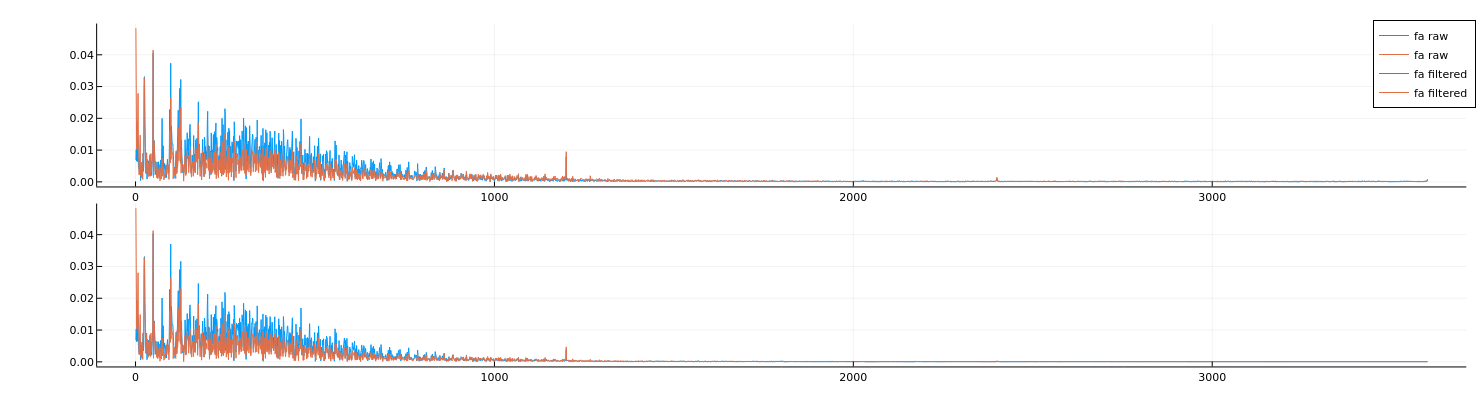

In [31]:
plot(p2, p4, layout=(2,1))

In [32]:
#-tfa = TFanalyticsignal(ecg[1,:], fs, fmax=32)

#using Plots.Measures
#tfArgs=(right_margin = 2mm,
#        top_margin = 2mm,
#        xtickfont = font(10, "Times"),
#        ytickfont = font(10, "Times"))

#heatmap(tfa.y, real(tfa.y))

In [33]:
#?TFanalyticsignal